<font color='blue'> **FHB Package** </font> 

In [ ]:
import os; import flopy ; import matplotlib.pyplot as plt ; import pandas as pd; import numpy as np  ; from pathlib import Path  
sim_name = "ex-gwf-fhb" ; output_folder = Path("./05_ex-gwf-fhb") ; output_folder.mkdir(exist_ok=True) ; gwf_name  = sim_name
exe_name = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6.exe'                ; sim_ws = workspace =  figs_path = output_folder            

In [57]:
length_units = "meters" ; nper = 3 ;  nlay = 1 ;  ncol = 10 ;  nrow = 3            ;  delr = 1000 ;  delc = 1000 ;  top = 50 ;  
time_units   = "days"   ; botm_str = "-200.0"  ;  strt = 0  ;  icelltype_str = "0" ;  k11_str = "20.0" ;  ss = 0.01 ;  
perlen = [400.0,200.0,400.0] ;  nstp = [10,4,6]        ;  tsmult = [1.0,1.0,1.0]   ;  tdis_ds = list(zip(perlen,nstp,tsmult)) ;  
nouter = 50 ;  ninner = 100 ;  hclose = 0.000000001    ;  rclose = 0.000001        ;  botm = [float(value) for value in botm_str.split(",")]
k11 = [float(value) for value in k11_str.split(",")]                        ; icelltype = [int(value) for value in icelltype_str.split(",")]

In [58]:
chd_spd = [] ; chd_spd += [[0,i,9,"CHDHEAD"] for i in range(3)] ; chd_spd={0:chd_spd} ; tsdata  = [(0.0,0.0),(307.0,1.0),(791.0,5.0),(1000.0,2.0)]
chd_ts  = {"timeseries":tsdata,"time_series_namerecord":"CHDHEAD","interpolation_methodrecord":"LINEAREND"}  

wel_spd = [] ; wel_spd += [[0,1,0,"FLOWRATE"]] ; wel_spd={0:wel_spd}          ; tsdata=[(0.0,2000.0),(307.0,6000.0),(791.0,5000.0),(1000.0,9000.0)]
wel_ts  = {"timeseries" :tsdata ,"time_series_namerecord":"FLOWRATE" ,"interpolation_methodrecord":"LINEAREND"}

head_filerecord = f"{sim_name}.hds" ; budget_filerecord=f"{sim_name}.cbc"  
obsdict = {} ; obslist = [["h1_2_1","head",(0,1,0)],["h1_2_10","head",(0,1,9)]]   ; obsdict[f"{sim_name}.obs.head.csv"]=obslist
obslist                = [["icf1","flow-ja-face",(0,1,1),(0,1,0)]]                ; obsdict[f"{sim_name}.obs.flow.csv"]=obslist  

In [59]:
perlen = [400.0,200.0,400.0] ;  nstp = [10,4,6]       ; tsmult = [1.0,1.0,1.0] ;  tdis_ds_B = list(zip(perlen,nstp,tsmult)) 
print('tdis_ds      ',tdis_ds) ; print('tdis_ds_B    ', tdis_ds_B, '    sum(perlen)    ', np.sum(perlen))
b1=np.linspace(0,400,num=10,endpoint=True) ;b2=np.linspace(400,600,num=4,endpoint=True) ; b3=np.linspace(600,1000,num=6,endpoint=True); b1,b2,b3
np.savetxt(output_folder / "a1_timprs.csv", np.concatenate((b1, b2, b3)), delimiter=",")

tdis_ds       [(400.0, 10, 1.0), (200.0, 4, 1.0), (400.0, 6, 1.0)]
tdis_ds_B     [(400.0, 10, 1.0), (200.0, 4, 1.0), (400.0, 6, 1.0)]     sum(perlen)     1000.0


In [60]:
tmm = chd_ts["timeseries"] ; np.savetxt(workspace/"a2_chd_ts.csv",tmm,delimiter = ",") ; print('chd_ts "timeseries"',tmm)

chd_ts "timeseries" [(0.0, 0.0), (307.0, 1.0), (791.0, 5.0), (1000.0, 2.0)]


In [61]:
sa = pd.DataFrame(chd_spd[0]);  sa.to_csv (output_folder / "a3_chd_spd.csv") ; print('chd_spd'); sa

chd_spd


,0,1,2,3
0,0,0,9,CHDHEAD
1,0,1,9,CHDHEAD
2,0,2,9,CHDHEAD


In [62]:
tmm = wel_ts["timeseries"] ; np.savetxt(workspace/"a4_WEL_ts.csv",tmm,delimiter = ",") ; print('wel_ts "timeseries"',tmm)

wel_ts "timeseries" [(0.0, 2000.0), (307.0, 6000.0), (791.0, 5000.0), (1000.0, 9000.0)]


In [63]:
df = pd.DataFrame.from_dict(wel_spd, orient='index') ; print('WEL_spd');  df                                  

WEL_spd


,0
0,"[0, 1, 0, FLOWRATE]"


In [64]:
sa = pd.DataFrame(obslist[0]); sa

,0
0,icf1
1,flow-ja-face
2,"(0, 1, 1)"
3,"(0, 1, 0)"


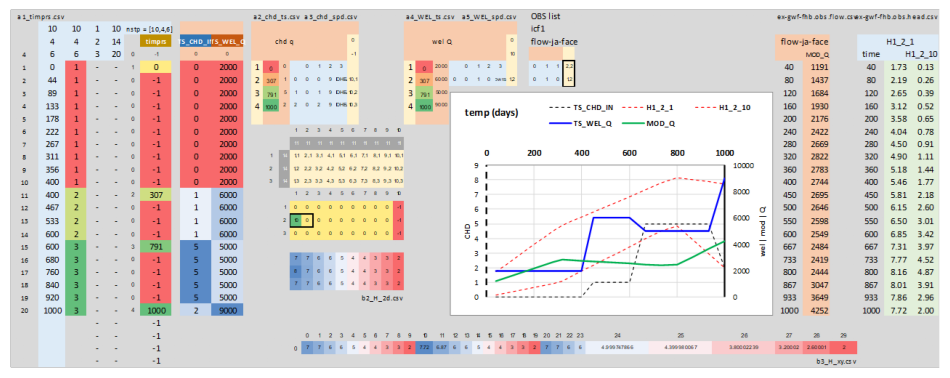

In [65]:
image = plt.imread('_aux\\05_FHB.PNG'); fig, ax = plt.subplots(figsize=(12, 8)) ; ax.imshow(image) ; ax.axis('off') ; plt.show() 

In [66]:
sim = flopy.mf6.MFSimulation (sim_name=sim_name, sim_ws=sim_ws, exe_name=exe_name)
flopy.mf6.ModflowTdis  (sim, nper=nper, perioddata=tdis_ds, time_units=time_units)
flopy.mf6.ModflowIms   (sim,outer_maximum=nouter,inner_maximum=ninner,outer_dvclose=hclose,inner_dvclose=hclose,rcloserecord=f"{rclose} strict")
gwf = flopy.mf6.ModflowGwf   (sim, modelname=sim_name, save_flows=True)
flopy.mf6.ModflowGwfdis (gwf ,length_units=length_units,nlay=nlay,nrow=nrow,ncol=ncol,delr=delr,delc=delc,top=top,botm=botm)
flopy.mf6.ModflowGwfnpf (gwf ,icelltype=icelltype ,k=k11 ,save_specific_discharge=True)
flopy.mf6.ModflowGwfic  (gwf ,strt=strt)
flopy.mf6.ModflowGwfsto (gwf ,storagecoefficient=True    ,iconvert=0 , ss=1.0e-6, sy=None, transient={0:True})
flopy.mf6.ModflowGwfchd (gwf ,stress_period_data=chd_spd ,timeseries=chd_ts ,pname="CHD")                      ; tsdataCHD= tsdata
flopy.mf6.ModflowGwfwel (gwf ,stress_period_data=wel_spd ,timeseries=wel_ts ,pname="WEL")                      ; tsdataWel= tsdata
flopy.mf6.ModflowGwfoc  (gwf ,head_filerecord=f"{sim_name}.hds",budget_filerecord=f"{sim_name}.bud", headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
                        saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")] ,printrecord=[("HEAD", "ALL"), ("BUDGET", "ALL")])   
flopy.mf6.ModflowUtlobs (gwf ,print_input=False,continuous=obsdict)     ; sim.write_simulation(silent=True)  ; sim.run_simulation(silent=True)  

(True, [])

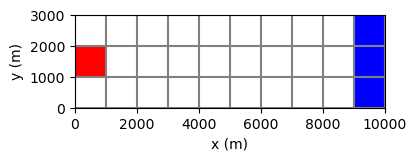

In [67]:
fig = plt.figure(figsize=(4, 3.0)) ; fig.tight_layout()     ; ax = fig.add_subplot(1, 1, 1, aspect="equal")
pmv = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=0)     ; pmv.plot_grid()      ; pmv.plot_bc(name="CHD",color="blue") ; pmv.plot_bc(name="WEL") 
ax.set_xlabel("x (m)")                                      ; ax.set_ylabel("y (m)") ; plt.show()

In [68]:
obsnames = gwf.obs.output.obs_names    # ; obs_list = [gwf.obs.output.obs(f=obsnames[0]),    gwf.obs.output.obs(f=obsnames[1])]
print('obsnames:  ', obsnames)
tsdata1  = gwf.obs.output.obs(f=obsnames[0])  ; ts1 = tsdata1.data ; ts1na = ts1.dtype.names[1:] ; print('ts.names_   ts1:',ts1na) 
tsdata2  = gwf.obs.output.obs(f=obsnames[1])  ; ts2 = tsdata2.data ; ts2na = ts2.dtype.names[1:] ; print('ts.names_   ts2:',ts2na) 

obsnames:   ['ex-gwf-fhb.obs.head.csv', 'ex-gwf-fhb.obs.flow.csv']
ts.names_   ts1: ('H1_2_1', 'H1_2_10')
ts.names_   ts2: ('ICF1',)


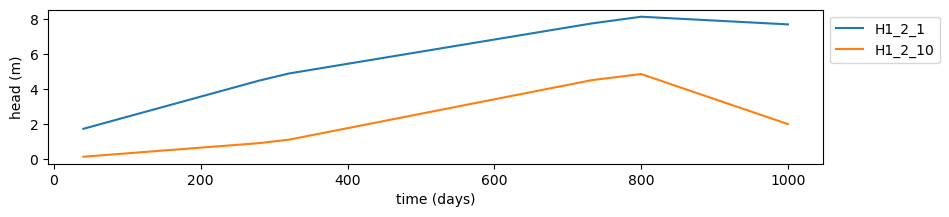

In [69]:
df = pd.DataFrame(ts1); ax = df.plot(x="totim", y= list(ts1na) , kind="line", rot=0, figsize=(10,2)); 
ax.legend(bbox_to_anchor=(1.0, 1.0)); ax.set(xlabel="time (days)", ylabel="head (m)"); plt.show()

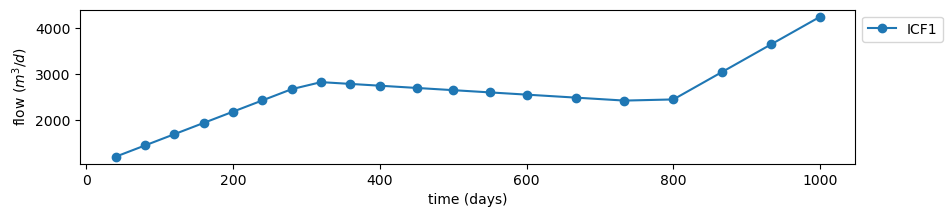

In [70]:
df = pd.DataFrame(ts2); ax = df.plot(x="totim", y= list(ts2na) , kind="line",marker = 'o', rot=0, figsize=(10,2)); 
ax.legend(bbox_to_anchor=(1.0, 1.0)); ax.set(xlabel="time (days)", ylabel="flow ($m^3/d$)"); plt.show()
np.savetxt(output_folder / "b1_.csv", df, delimiter=",")

In [71]:
fname = os.path.join (output_folder/ f"{sim_name}.hds")    
hdobj = flopy.utils.HeadFile(fname); headsA=hdobj.get_data() ; headsB=headsA[0,:,:] ;tn=pd.DataFrame(headsB) ;tn.to_csv(output_folder/"b2_H_2d.csv")
print(headsA.shape) 

(1, 3, 10)


In [72]:
hobj = gwf.output.head()    ; hds = hobj.get_data()                      ; print('H (2000d) = ', hds      .shape)
cobj = gwf.output.budget()  ; spd = cobj.get_data(text="DATA-SPDIS")[0]  ; print('Q (2000d) = ', spd      .shape) 

H (2000d) =  (1, 3, 10)
Q (2000d) =  (30,)


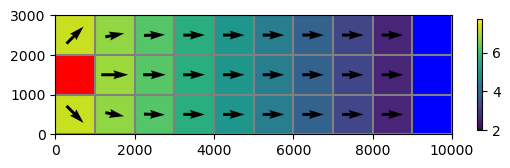

In [73]:
mm = flopy.plot.PlotMapView(model=gwf, layer=0, extent=gwf.modelgrid.extent) ; 
cbv = mm.plot_array(hds); q = mm.plot_vector(spd["qx"], spd["qy"]) ;  cb = plt.colorbar(cbv, ax=mm.ax, shrink=.3)
mm.plot_grid()      ; mm.plot_bc(name="CHD",color="blue" )     ; mm.plot_bc(name="WEL")

## **x,y = distancies (m)**

In [74]:
sv = hds.reshape(hds.shape[0],-1)  ; then=pd.DataFrame(sv)  ; then.to_csv (output_folder / 'b3_H_xy.csv' )  ; print('sv_HDS   ', sv.shape)
sv_2D = hds.reshape(ncol , nrow)  ; print('sv_HDS_2D', sv.shape)

sv_HDS    (1, 30)
sv_HDS_2D (1, 30)


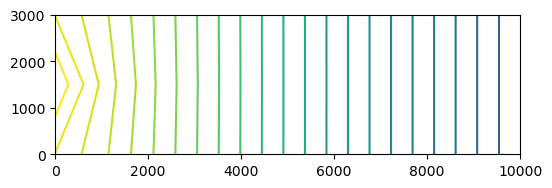

In [75]:
fig = plt.figure(figsize=(6, 6)) ; ax = fig.add_subplot(1, 1, 1, aspect="equal"); ll=90
ax.contour(hds[0,:,:],  levels=np.arange(0,   np.percentile(sv,99.9)    ,0.25) ,  extent = gwf.modelgrid.extent) ; plt.show()

In [76]:
times = hobj.get_times()  ; np.savetxt(output_folder / "b4_times.csv", times, delimiter=",") 

In [77]:
print('tsdataCHD', tsdataCHD) ; print('');  print('tsdataWel', tsdataWel)

np.savetxt(output_folder / "b5_tsdataCHD.csv", tsdataCHD, delimiter=",")
np.savetxt(output_folder / "b6_tsdataWel.csv", tsdataWel, delimiter=",")

tsdataCHD [(0.0, 2000.0), (307.0, 6000.0), (791.0, 5000.0), (1000.0, 9000.0)]

tsdataWel [(0.0, 2000.0), (307.0, 6000.0), (791.0, 5000.0), (1000.0, 9000.0)]


In [78]:
tdis_rc = []
for i in range(nper):
    tdis_rc.append((perlen[i], nstp[i], tsmult[i]))
tdis_rc 

[(400.0, 10, 1.0), (200.0, 4, 1.0), (400.0, 6, 1.0)]

In [79]:
tdis_ds = list(zip(perlen,nstp,tsmult)) ; tdis_ds

[(400.0, 10, 1.0), (200.0, 4, 1.0), (400.0, 6, 1.0)]